In [32]:
%pip install h5py
%pip install xarray
%pip install netCDF4
%pip install satpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import h5py
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl
from matplotlib import colors
import matplotlib.patches as mpatches
import matplotlib as mpl
import requests
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from satpy import available_readers


In [2]:
available_readers()

['abi_l1b',
 'abi_l1b_scmi',
 'abi_l2_nc',
 'acspo',
 'agri_fy4a_l1',
 'agri_fy4b_l1',
 'ahi_hrit',
 'ahi_hsd',
 'ahi_l1b_gridded_bin',
 'ami_l1b',
 'amsr2_l1b',
 'amsr2_l2',
 'amsr2_l2_gaasp',
 'amsub_l1c_aapp',
 'atms_l1b_nc',
 'atms_sdr_hdf5',
 'avhrr_l1b_aapp',
 'avhrr_l1b_eps',
 'avhrr_l1b_hrpt',
 'avhrr_l1c_eum_gac_fdr_nc',
 'cmsaf-claas2_l2_nc',
 'electrol_hrit',
 'epic_l1b_h5',
 'fci_l1c_nc',
 'fci_l2_nc',
 'generic_image',
 'geocat',
 'ghi_l1',
 'ghrsst_l2',
 'glm_l2',
 'goes-imager_hrit',
 'goes-imager_nc',
 'gpm_imerg',
 'hsaf_h5',
 'hy2_scat_l2b_h5',
 'iasi_l2',
 'iasi_l2_cdr_nc',
 'ici_l1b_nc',
 'jami_hrit',
 'li_l2_nc',
 'maia',
 'meris_nc_sen3',
 'mersi2_l1b',
 'mersi_ll_l1b',
 'mhs_l1c_aapp',
 'mimicTPW2_comp',
 'mirs',
 'msi_safe',
 'msu_gsa_l1b',
 'mtsat2-imager_hrit',
 'mviri_l1b_fiduceo_nc',
 'mwi_l1b_nc',
 'mws_l1b_nc',
 'nucaps',
 'nwcsaf-geo',
 'nwcsaf-msg2013-hdf5',
 'nwcsaf-pps_nc',
 'oceancolorcci_l3_nc',
 'olci_l1b',
 'olci_l2',
 'omps_edr',
 'safe_sar_l2_ocn

In [3]:
filenames = ['../data/MSG3-SEVI-MSG15-0100-NA-20230421181241.751000000Z-NA/MSG3-SEVI-MSG15-0100-NA-20230421181241.751000000Z-NA.nat']

In [4]:
from satpy import Scene
scn = Scene(reader="seviri_l1b_native", filenames=filenames)
scn.load([0.6, 0.8, 10.8])
scn.load(['VIS006', 'VIS008', 'IR_120', 'IR_134'])

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/satpy/readers/seviri_base.py:386: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset.coords['acq_time'] = ('y', acq_time)
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/satpy/readers/seviri_base.py:386: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64

In [5]:
print(scn)

<xarray.DataArray 'reshape-405cf274b9423b697388bf7e3bcd573b' (y: 3712, x: 3712)>
dask.array<truediv, shape=(3712, 3712), dtype=float32, chunksize=(928, 3712), chunktype=numpy.ndarray>
Coordinates:
    acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT NaT ... NaT NaT NaT NaT NaT
    crs       object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",...
  * y         (y) float64 -5.566e+06 -5.563e+06 ... 5.566e+06 5.569e+06
  * x         (x) float64 5.566e+06 5.563e+06 5.56e+06 ... -5.566e+06 -5.569e+06
Attributes: (12/18)
    orbital_parameters:       {'projection_longitude': 0.0, 'projection_latit...
    time_parameters:          {'nominal_start_time': datetime.datetime(2023, ...
    units:                    K
    wavelength:               10.8 µm (9.8-11.8 µm)
    standard_name:            toa_brightness_temperature
    platform_name:            Meteosat-10
    ...                       ...
    name:                     IR_108
    resolution:               3000.403165817
    cal

In [6]:
visible = scn['VIS006']

In [48]:
print(visible.attrs)

{'orbital_parameters': {'projection_longitude': 0.0, 'projection_latitude': 0.0, 'projection_altitude': 35785831.0, 'satellite_nominal_longitude': 0.0, 'satellite_nominal_latitude': 0.0, 'satellite_actual_longitude': -0.31658671429028135, 'satellite_actual_latitude': 1.8540874664149811, 'satellite_actual_altitude': 35788531.46822071}, 'time_parameters': {'nominal_start_time': datetime.datetime(2023, 4, 21, 18, 0, 10, 363039), 'nominal_end_time': datetime.datetime(2023, 4, 21, 18, 15, 10, 283326), 'observation_start_time': datetime.datetime(2023, 4, 21, 18, 0, 10, 363000), 'observation_end_time': datetime.datetime(2023, 4, 21, 18, 12, 41, 751000)}, 'sun_earth_distance_correction_applied': True, 'sun_earth_distance_correction_factor': 1.0045495828312838, 'units': '%', 'wavelength': WavelengthRange(min=0.56, central=0.635, max=0.71, unit='µm'), 'standard_name': 'toa_bidirectional_reflectance', 'platform_name': 'Meteosat-10', 'sensor': 'seviri', 'georef_offset_corrected': True, 'start_time

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [49]:
visible.attrs.get("orbital_parameters")

{'projection_longitude': 0.0,
 'projection_latitude': 0.0,
 'projection_altitude': 35785831.0,
 'satellite_nominal_longitude': 0.0,
 'satellite_nominal_latitude': 0.0,
 'satellite_actual_longitude': -0.31658671429028135,
 'satellite_actual_latitude': 1.8540874664149811,
 'satellite_actual_altitude': 35788531.46822071}

In [50]:
visible.attrs.get("time_parameters")

{'nominal_start_time': datetime.datetime(2023, 4, 21, 18, 0, 10, 363039),
 'nominal_end_time': datetime.datetime(2023, 4, 21, 18, 15, 10, 283326),
 'observation_start_time': datetime.datetime(2023, 4, 21, 18, 0, 10, 363000),
 'observation_end_time': datetime.datetime(2023, 4, 21, 18, 12, 41, 751000)}

In [57]:
visible.attrs.get("area")

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Area ID: msg_seviri_fes_3km
Description: MSG SEVIRI Full Earth Scanning service area definition with 3 km resolution
Projection: {'a': '6378169', 'h': '35785831', 'lon_0': '0', 'no_defs': 'None', 'proj': 'geos', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 3712
Number of rows: 3712
Area extent: (5567248.0742, 5570248.4773, -5570248.4773, -5567248.0742)

In [8]:
scn.available_dataset_names()

['HRV',
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073']

In [9]:
visible.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [10]:
othervis = scn['VIS008']

In [11]:
infrared =scn['IR_120']

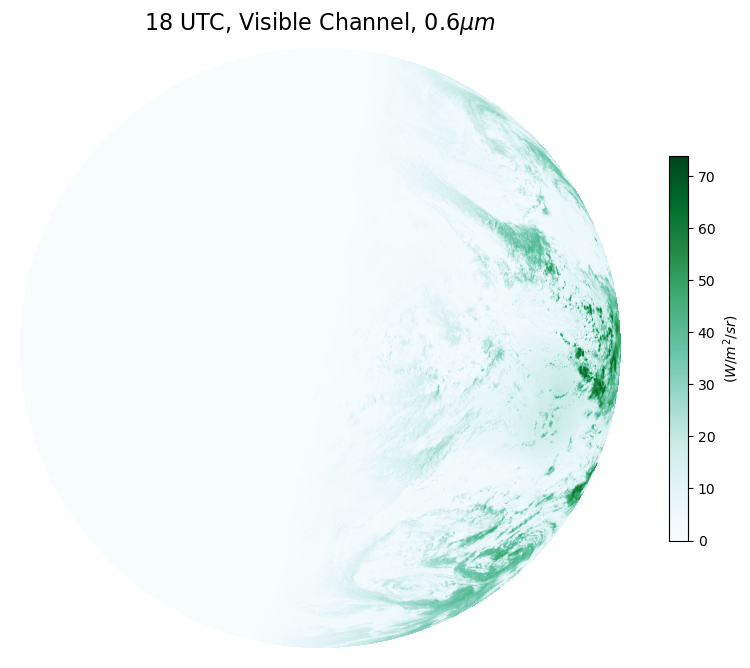

In [12]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(visible, cmap='BuGn')
plt.colorbar(shrink=1/2, label=r'$(W/m^2/sr)$')
plt.title(r'18 UTC, Visible Channel, $0.6\mu m$', fontsize=16)
plt.show()

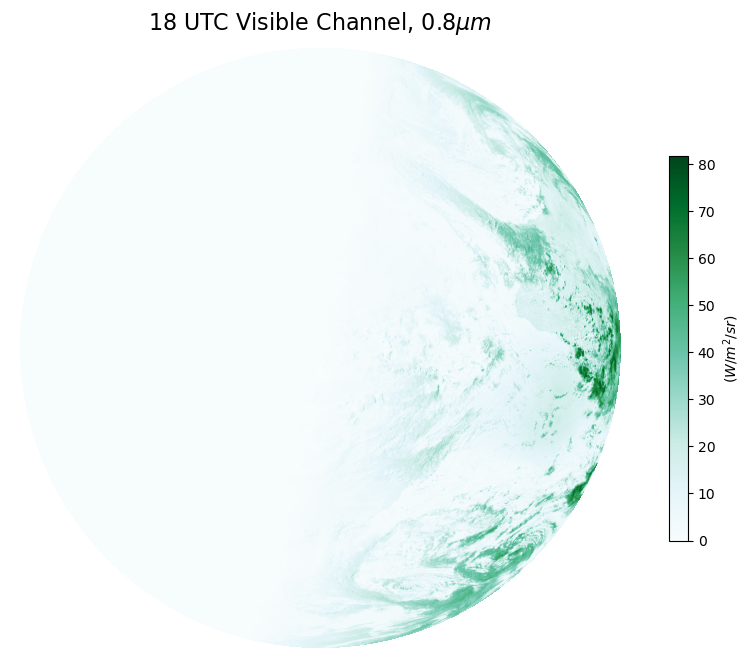

In [13]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(othervis, cmap='BuGn')
plt.colorbar(shrink=1/2, label=r'$(W/m^2/sr)$')
plt.title(r'18 UTC Visible Channel, $0.8\mu m$', fontsize=16)
plt.show()

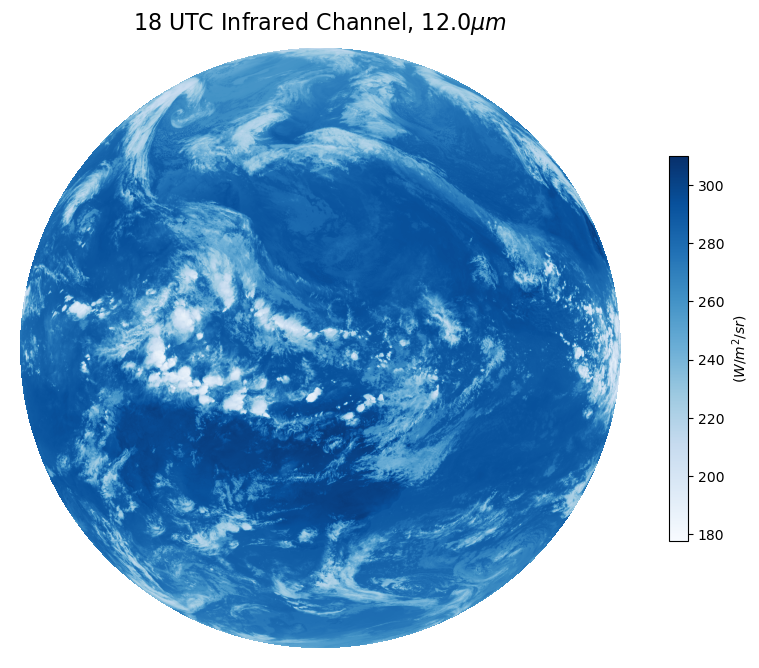

In [14]:
plt.figure(figsize=(10, 10))
plt.axis('off')
# RdPu
plt.imshow(infrared, cmap='Blues')
plt.colorbar(shrink=1/2, label=r'$(W/m^2/sr)$')
plt.title(r'18 UTC Infrared Channel, $12.0\mu m$', fontsize=16)
plt.show()

In [15]:
infraredother = scn['IR_108']

In [16]:
cartopy.config['data_dir']

'/Users/mark/.local/share/cartopy'

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


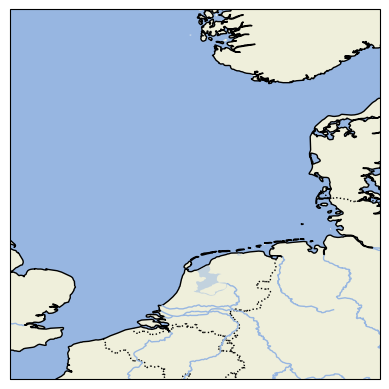

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([0, 10, 50, 60], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

plt.show()

In [21]:
radarFile = h5py.File('../data/radar/radar_nl_202304211800.h5')

In [22]:
keys = list(radarFile.keys())

In [23]:
radarFile['sourceimage']

<HDF5 dataset "sourceimage": shape (1660, 1340, 3), type "|u1">

In [24]:
radarFile['sourceimage']

<HDF5 dataset "sourceimage": shape (1660, 1340, 3), type "|u1">

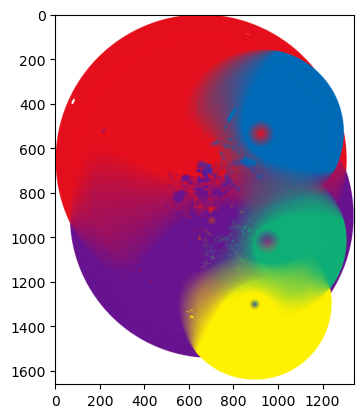

In [25]:
plt.imshow(radarFile['sourceimage'])

In [26]:
radarFile['sourceimage']

<HDF5 dataset "sourceimage": shape (1660, 1340, 3), type "|u1">

echotopheight


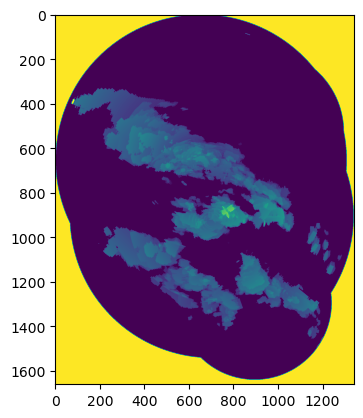

geographic
key not an image
image1
key not an image
overview
key not an image
precipitationrate


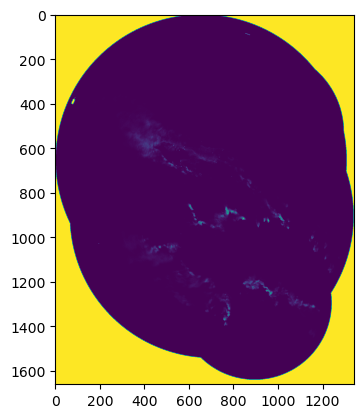

radar1
key not an image
radar2
key not an image
radar3
key not an image
radar4
key not an image
radar5
key not an image
reflectivity


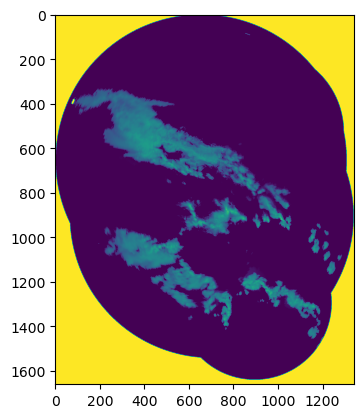

reflectivitymax


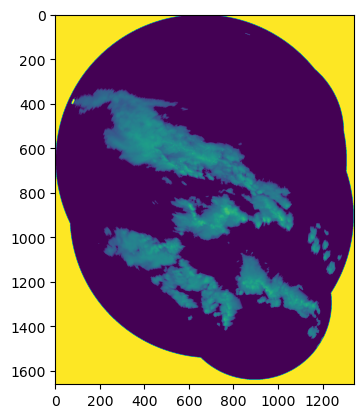

sourceimage


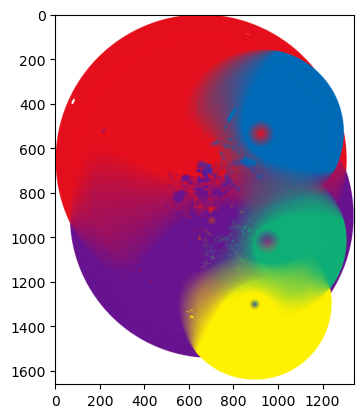

visualisation1
key not an image


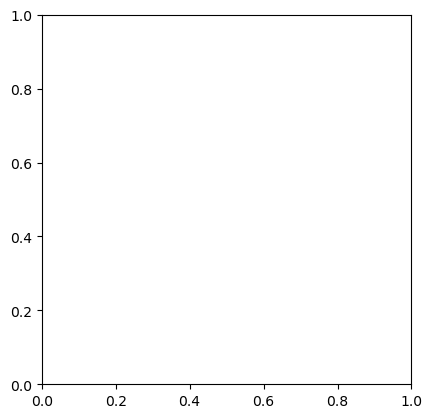

In [27]:
for key in keys:
    print(key)
    try:
        plt.imshow(radarFile[key])
        plt.show()
    except:
        print(f'key not an image')

<KeysViewHDF5 ['hdftag_version_number', 'number_image_groups', 'number_radar_groups', 'number_satellite_groups', 'number_stations_groups', 'product_datetime_end', 'product_datetime_start', 'product_group_name', 'products_missing']>

In [28]:
cutOffRadar = np.array(radarFile['reflectivity'][:])
cutOffRadar = np.where(np.isin(cutOffRadar, 255), 0, cutOffRadar)

In [29]:
cutOffRadar

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

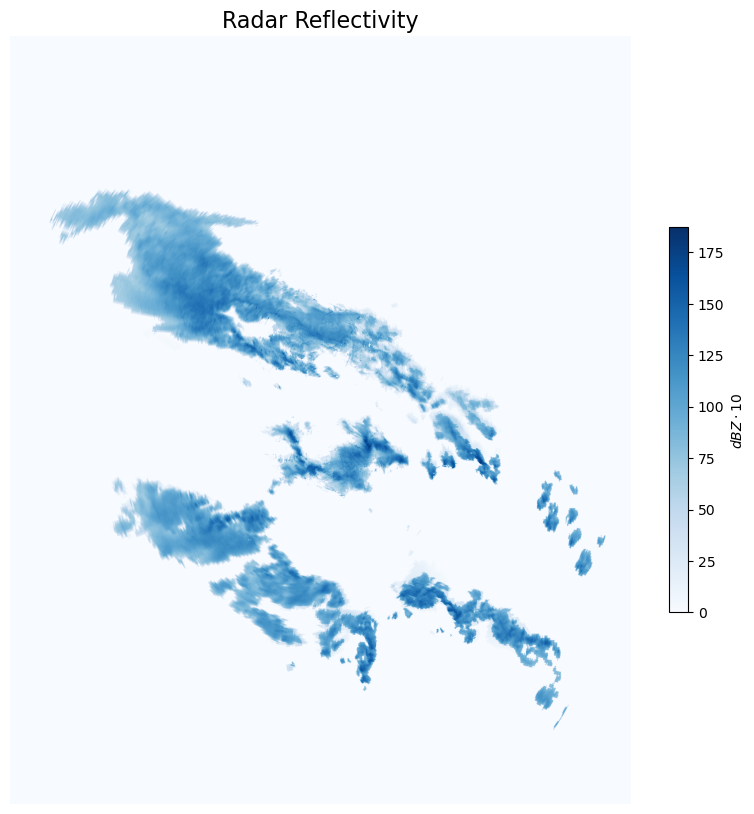

In [30]:
plt.figure(figsize=(10, 10))
plt.axis('off')
# RdPu
plt.imshow(cutOffRadar, cmap='Blues')
plt.colorbar(shrink=1/2, label=r'$dBZ \cdot 10$')
plt.title(r'Radar Reflectivity', fontsize=16)
plt.show()

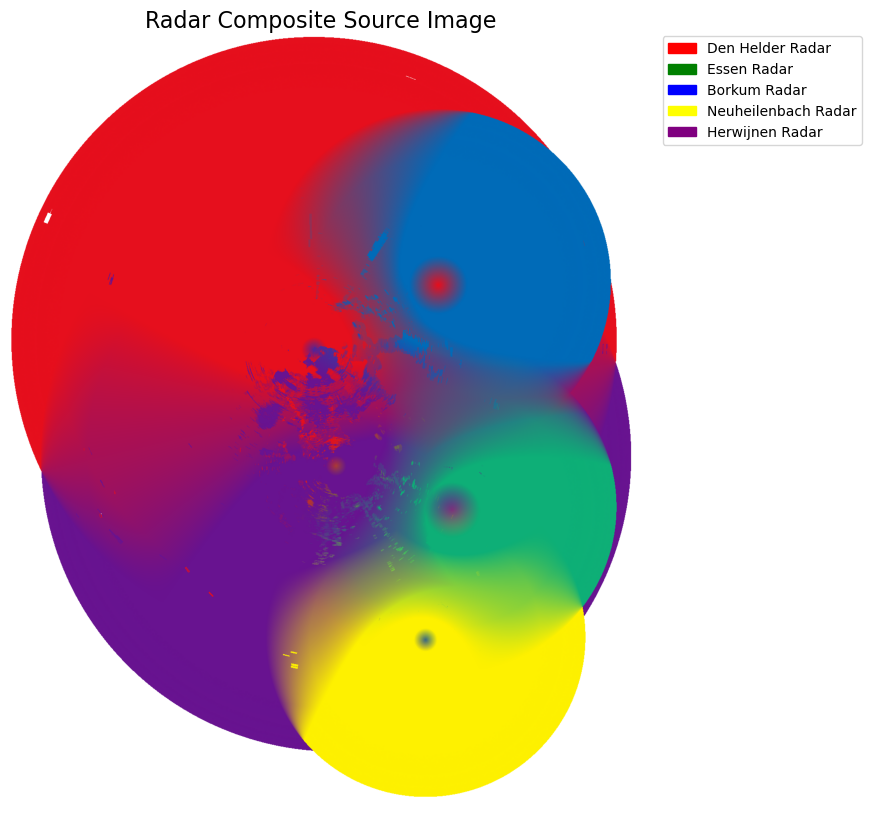

In [31]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(radarFile['sourceimage'])
plt.title(r'Radar Composite Source Image', fontsize=16)

patches = [
    mpatches.Patch(color="red", label="Den Helder Radar" ),
    mpatches.Patch(color="green", label="Essen Radar" ),
    mpatches.Patch(color="blue", label="Borkum Radar" ),
    mpatches.Patch(color="yellow", label="Neuheilenbach Radar" ),
    mpatches.Patch(color="purple", label="Herwijnen Radar" ),

]

# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()

AttributeError: 'AttributeManager' object has no attribute 'ke'

In [32]:
radar = np.load("../data/preprocessed/radar/radar_nl_202304211800.npy")
satellite = np.load(
    "../data/preprocessed/satellite/MSG3-SEVI-MSG15-0100-NA-20230421181241.751000000Z-NA.nat.npy"
)

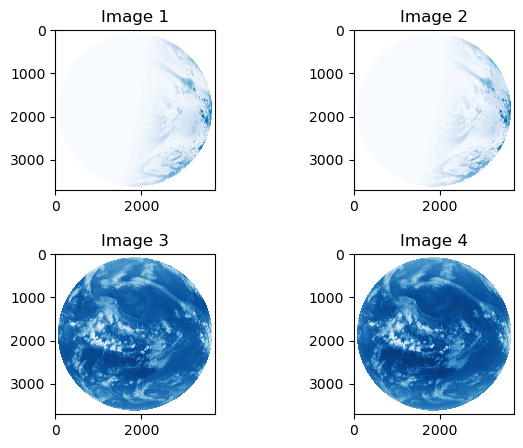

In [33]:
# Create a figure with a grid of four images
fig, axs = plt.subplots(2, 2)

# Plot each image in a separate subplot
axs[0, 0].imshow(satellite[0], cmap='Blues')
axs[0, 1].imshow(satellite[1], cmap='Blues')
axs[1, 0].imshow(satellite[2], cmap='Blues')
axs[1, 1].imshow(satellite[3], cmap='Blues')

# Add titles to each subplot
axs[0, 0].set_title('Image 1')
axs[0, 1].set_title('Image 2')
axs[1, 0].set_title('Image 3')
axs[1, 1].set_title('Image 4')

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Show the plot
plt.show()

In [36]:
result = scn.resample('euro4')

INFO:satpy.scene:Not reducing data before resampling.
INFO:satpy.resample:Using default KDTree resampler
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/satpy/resample.py:448: UserWarning: Upgrade 'pyresample' for a more accurate default 'radius_of_influence'.
  cache_id = self.precompute(cache_dir=cache_dir, **kwargs)
INFO:satpy.resample:Using default KDTree resampler


/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))


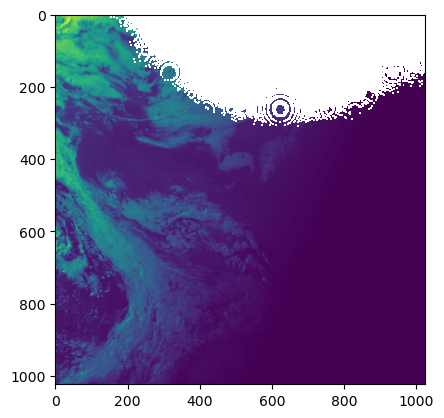

In [37]:
plt.imshow(result['VIS006'])

In [39]:
from pyresample.geometry import AreaDefinition

In [110]:
netherlands_extent = AreaDefinition.from_extent(
    "netherlands",
    projection="+proj=merc h=35785831.0",
    # area_extent=(-5569000.0, -5569000.0, 5569000.0, 5569000.0),
    area_extent=(-5569000.0, -5569000.0, 5669000.0, 5669000.0),
    shape=(1000, 1000),
    units="m",
)

In [103]:
north_europe_extent = AreaDefinition.from_extent(
    "netherlands",
    projection="+proj=geos h=35785831.0",
    area_extent=(-569000.0, -5569000.0, 9569000.0, 9669000.0),
    shape=(250, 250),
    units="m",
)

In [111]:
local_scene = scn.resample(netherlands_extent)

INFO:satpy.scene:Not reducing data before resampling.
INFO:satpy.resample:Using default KDTree resampler
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/satpy/resample.py:448: UserWarning: Upgrade 'pyresample' for a more accurate default 'radius_of_influence'.
  cache_id = self.precompute(cache_dir=cache_dir, **kwargs)
INFO:satpy.resample:Using default KDTree resampler


In [94]:
neu = scn.resample(north_europe_extent)

INFO:satpy.scene:Not reducing data before resampling.
INFO:satpy.resample:Using default KDTree resampler
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/satpy/resample.py:448: UserWarning: Upgrade 'pyresample' for a more accurate default 'radius_of_influence'.
  cache_id = self.precompute(cache_dir=cache_dir, **kwargs)
INFO:satpy.resample:Using default KDTree resampler
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/numpy/lib/function_base.py:1448: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


In [64]:
def print_map(scene):
  crs = scene['IR_120'].attrs['area'].to_cartopy_crs()
  ax = plt.axes(projection=crs)

  ax.coastlines()
  ax.gridlines()
  ax.set_global()
  plt.imshow(scene['IR_120'], transform=crs, extent=crs.bounds, origin='upper', cmap="Blues")
  cbar = plt.colorbar()
  cbar.set_label("Kelvin")
  plt.show()

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: 

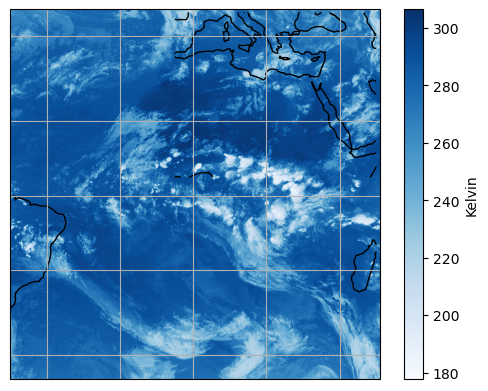

In [112]:
print_map(local_scene)

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


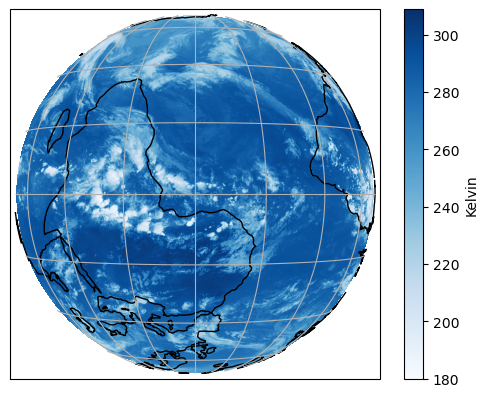

In [66]:
print_map(scn)

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


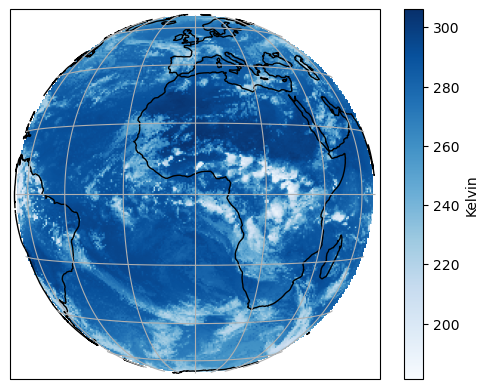

In [113]:
print_map(neu)

In [119]:
my_array = np.array(neu["IR_120"].values)

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))


In [120]:
my_array.shape

(250, 250)